In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

digits = datasets.load_digits() # load digit datasets

In [2]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [4]:
digits.data.shape

(1797, 64)

In [5]:
digits.images.shape

(1797, 8, 8)

In [6]:
digits.images[:2] # feature of datasets

array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
        [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
        [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
        [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]])

In [7]:
digits.target.shape

(1797,)

In [8]:
digits.target[:40] # output of datasets

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9])

In [9]:
np.isnan(digits.images).sum() # find missing data

0

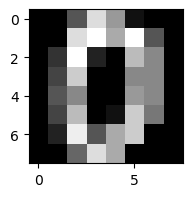

In [10]:
img = digits.images[0]
plt.figure(figsize = (2,2))
plt.imshow(img, cmap = plt.cm.gray)
plt.show()

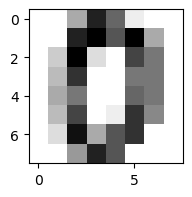

In [11]:
plt.figure(figsize = (2,2))
plt.imshow(img, cmap = plt.cm.gray_r) # switch values of color if smallest is dark tone
plt.show()

In [12]:
def visual_multi(i):
    '''
    show multiple visual of datasets

    :param i: index need to start
    :output => plt.show() 
    '''
    nplots = 40 # quatity feature of datasets
    fg = plt.figure(figsize = (8,4))
    for j in range(nplots):
        plt.subplot(4, 10, j+1) # 4 rows, 10 columns, j is frame by index of j
        plt.imshow(digits.images[i+j], cmap = 'binary') # output type image
        plt.title(digits.target[i+j]) # เอา digits.target มาเป็น title ของแต่ละภาพ
        plt.axis('off') # don't show border
    plt.show()

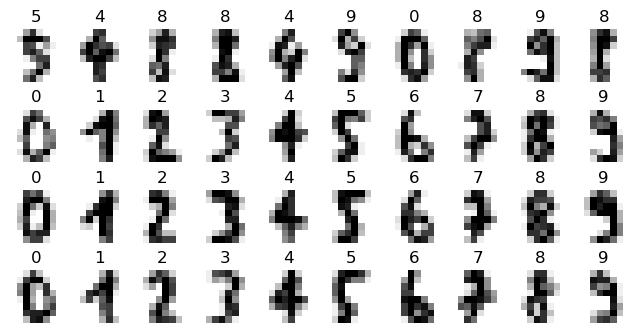

In [13]:
visual_multi(120)